*Copyright 2024 Jaeyoung Chun*

You may not make copies of this and use or distribute it for any purpose.

# StatsBomb Shot Freeze Frame

In [1]:
from statsbombpy import sb
import warnings
#ignore by message
warnings.filterwarnings("ignore", message="credentials were not supplied")

import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
from tqdm import tqdm

## FIFA Worldcup 2022 Korea vs. Portugal

In [2]:
match_id = 3857262

In [3]:
df_events = sb.events(match_id=match_id)

## Get Events

In [4]:
df_events

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",South Korea,791,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Portugal,780,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,South Korea,791,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,South Korea,791,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Ui-Jo Hwang,NaN,South Korea,791,00:36:13.753,Substitution,NaN
3375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,William Silva de Carvalho,NaN,Portugal,780,00:36:13.762,Substitution,NaN
3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Bernardo Mota Veiga de Carvalho e Silva,NaN,Portugal,780,00:36:13.790,Substitution,NaN
3377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Yu-Min Cho,NaN,South Korea,791,00:47:46.061,Substitution,NaN


## Goal After 45 Mins

In [5]:
# convert to `timedelta` in order to make easy for time search
df_events.timestamp = pd.to_timedelta(df_events.timestamp)

In [6]:
# goal after 45 minutes
df_goals_45 = df_events[ (df_events.shot_outcome == "Goal") & (df_events.timestamp > "00:45:00") ]
df_goals_45

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
3230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Normal,Open Play,NaN,NaN,NaN,South Korea,791,0 days 00:45:28.560000,Shot,NaN


In [7]:
# get event index
event_idx = df_goals_45.index
event_idx

Index([3230], dtype='int64')

In [8]:
df_shot = df_events.loc[event_idx].squeeze()

In [9]:
# who shot?
df_shot.player

'Hee-Chan Hwang'

## Shot Freeze Frame

In [10]:
df_shot.shot_freeze_frame

[{'location': [93.0, 59.0],
  'player': {'id': 40542, 'name': 'Gue-Sung Cho'},
  'position': {'id': 22, 'name': 'Right Center Forward'},
  'teammate': True},
 {'location': [98.2, 52.9],
  'player': {'id': 29966, 'name': 'Ui-Jo Hwang'},
  'position': {'id': 24, 'name': 'Left Center Forward'},
  'teammate': True},
 {'location': [97.8, 51.2],
  'player': {'id': 3083, 'name': 'Heung-Min Son'},
  'position': {'id': 12, 'name': 'Right Midfield'},
  'teammate': True},
 {'location': [99.1, 51.1],
  'player': {'id': 5214, 'name': 'William Silva de Carvalho'},
  'position': {'id': 13, 'name': 'Right Center Midfield'},
  'teammate': False},
 {'location': [98.9, 48.6],
  'player': {'id': 10868, 'name': 'Ricardo Jorge Luz Horta'},
  'position': {'id': 17, 'name': 'Right Wing'},
  'teammate': False},
 {'location': [101.1, 50.7],
  'player': {'id': 16028, 'name': 'José Diogo Dalot Teixeira'},
  'position': {'id': 2, 'name': 'Right Back'},
  'teammate': False},
 {'location': [102.8, 52.1],
  'player':

In [11]:
df_freeze = pd.DataFrame(df_shot.shot_freeze_frame)

In [12]:
df_freeze

,location,player,position,teammate
0,"[93.0, 59.0]","{'id': 40542, 'name': 'Gue-Sung Cho'}","{'id': 22, 'name': 'Right Center Forward'}",True
1,"[98.2, 52.9]","{'id': 29966, 'name': 'Ui-Jo Hwang'}","{'id': 24, 'name': 'Left Center Forward'}",True
2,"[97.8, 51.2]","{'id': 3083, 'name': 'Heung-Min Son'}","{'id': 12, 'name': 'Right Midfield'}",True
3,"[99.1, 51.1]","{'id': 5214, 'name': 'William Silva de Carvalho'}","{'id': 13, 'name': 'Right Center Midfield'}",False
4,"[98.9, 48.6]","{'id': 10868, 'name': 'Ricardo Jorge Luz Horta'}","{'id': 17, 'name': 'Right Wing'}",False
5,"[101.1, 50.7]","{'id': 16028, 'name': 'José Diogo Dalot Teixei...","{'id': 2, 'name': 'Right Back'}",False
6,"[102.8, 52.1]","{'id': 7005, 'name': 'João Pedro Cavaco Cancelo'}","{'id': 6, 'name': 'Left Back'}",False
7,"[97.8, 38.9]","{'id': 143854, 'name': 'António João Pereira A...","{'id': 5, 'name': 'Left Center Back'}",False
8,"[102.5, 47.0]","{'id': 12169, 'name': 'João Maria Lobo Alves P...","{'id': 10, 'name': 'Center Defensive Midfield'}",False
9,"[102.7, 44.4]","{'id': 20016, 'name': 'Kléper Laveran Lima Fer...","{'id': 3, 'name': 'Right Center Back'}",False


## Visualization

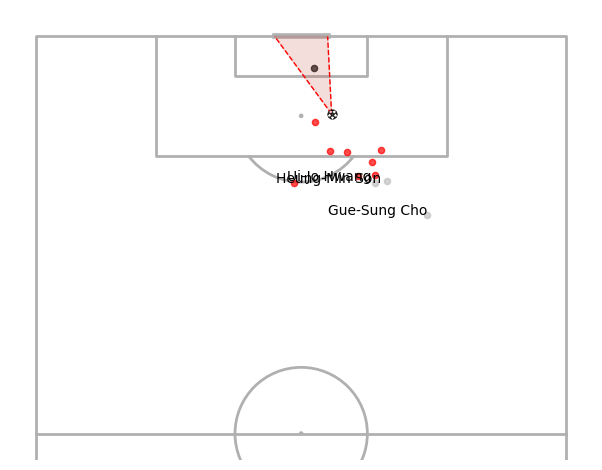

In [13]:
pitch = VerticalPitch(
    pitch_type="statsbomb",
    half=True
)

fig, ax = pitch.draw()

shot_x, shot_y = df_shot.location

pitch.scatter(
    shot_x, shot_y,
    marker="football",
    s=50, alpha=0.7, zorder=999,
    ax=ax
)

pitch.lines(
    shot_x, shot_y, 120, 36,
    color="red", linestyle="--", linewidth=1,
    ax=ax
)
pitch.lines(
    shot_x, shot_y, 120, 44,
    color="red", linestyle="--", linewidth=1,
    ax=ax
)

pitch.goal_angle(
    shot_x, shot_y, alpha=0.2, zorder=1.1,
    color='#cb5a4c', goal='right',
    ax=ax
)

for row in df_freeze.itertuples():

    player_x, player_y = row.location
    position = row.position

    if position["name"] == "Goalkeeper":
        pitch.scatter(
            player_x, player_y,
            c="black", s=20, alpha=0.7,
            ax=ax
        )
    else:
        pitch.scatter(
            player_x, player_y,
            c="silver" if row.teammate else "red", s=20, alpha=0.7,
            ax=ax
        )

    if row.teammate:
        player_name = row.player["name"]        
        pitch.annotate(player_name, (player_x, player_y - 15), ax=ax)

plt.show()